## Importing the libraries

In [795]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [797]:
# sklearn imports

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier

#SMOTE
from imblearn.over_sampling import SMOTE

## Load in min-max scaled and preprocessed data

In [800]:
df = pd.read_csv('data/min_max_scaled')

In [802]:
df.head()

,Unnamed: 0,KIDSDRIV,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,TRAVTIME,BLUEBOOK,...,CAR_USE_Commercial,CAR_USE_Private,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,URBANICITY_Highly Urban/ Urban,URBANICITY_z_Highly Rural/ Rural
0,0,0.0,0.0,0.478261,0.183497,0.0,0.000000,0.0,0.065693,0.186547,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.0,0.0,0.478261,0.249159,0.0,0.290588,0.0,0.124088,0.196952,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,0.0,0.0,0.478261,0.144078,0.0,0.000000,0.0,0.153285,0.299971,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3,0.0,0.2,0.434783,0.043699,0.0,0.140284,1.0,0.000000,0.036782,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,4,0.0,0.0,0.608696,0.145844,0.0,0.345936,1.0,0.197080,0.204279,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Drop the Unnamed and Claim Amount columns

In [804]:
df = df.drop(columns=['Unnamed: 0','CLM_AMT'])
df.columns

Index(['KIDSDRIV', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL',
       'MSTATUS', 'TRAVTIME', 'BLUEBOOK', 'TIF', 'RED_CAR', 'OLDCLAIM',
       'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'CLAIM_FLAG', 'GEN_AGE',
       'GENDER_M', 'GENDER_z_F', 'EDUCATION_<High School',
       'EDUCATION_Bachelors', 'EDUCATION_Masters', 'EDUCATION_PhD',
       'EDUCATION_z_High School', 'OCCUPATION_Clerical', 'OCCUPATION_Doctor',
       'OCCUPATION_Home Maker', 'OCCUPATION_Lawyer', 'OCCUPATION_Manager',
       'OCCUPATION_Professional', 'OCCUPATION_Student',
       'OCCUPATION_z_Blue Collar', 'CAR_USE_Commercial', 'CAR_USE_Private',
       'CAR_TYPE_Minivan', 'CAR_TYPE_Panel Truck', 'CAR_TYPE_Pickup',
       'CAR_TYPE_Sports Car', 'CAR_TYPE_Van', 'CAR_TYPE_z_SUV',
       'URBANICITY_Highly Urban/ Urban', 'URBANICITY_z_Highly Rural/ Rural'],
      dtype='object')

In [806]:
df.shape

(10302, 43)

## Revomed the claim flag column from the dataframe and reinsert it at index 42

In [808]:
flag = df.pop('CLAIM_FLAG')
df.insert(42, 'CLAIM_FLAG', flag)

## Splitting to independent and dependent varibles

In [810]:
X = df.iloc[:,0:42]
X

,KIDSDRIV,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,TRAVTIME,BLUEBOOK,TIF,...,CAR_USE_Commercial,CAR_USE_Private,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,URBANICITY_Highly Urban/ Urban,URBANICITY_z_Highly Rural/ Rural
0,0.00,0.0,0.478261,0.183497,0.0,0.000000,0.0,0.065693,0.186547,0.416667,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.00,0.0,0.478261,0.249159,0.0,0.290588,0.0,0.124088,0.196952,0.000000,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.00,0.0,0.478261,0.144078,0.0,0.000000,0.0,0.153285,0.299971,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.00,0.2,0.434783,0.043699,0.0,0.140284,1.0,0.000000,0.036782,0.125000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.00,0.0,0.608696,0.145844,0.0,0.345936,1.0,0.197080,0.204279,0.250000,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,0.25,0.4,0.391304,0.448653,0.0,0.436328,1.0,0.116788,0.172479,0.583333,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10298,0.00,0.0,0.391304,0.292085,0.0,0.375689,1.0,0.226277,0.336899,0.208333,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10299,0.00,0.0,0.652174,0.108539,0.0,0.192719,1.0,0.051095,0.180539,0.250000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
10300,0.00,0.0,0.304348,0.118369,0.0,0.168588,1.0,0.226277,0.308470,0.208333,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [812]:
y = df.iloc[:, 42]

In [814]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10297    0.0
10298    0.0
10299    0.0
10300    0.0
10301    0.0
Name: CLAIM_FLAG, Length: 10302, dtype: float64

## Spliting the data into 70% training and testing

In [816]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42,)


## Apply SMOTE to the training data

In [819]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# KNN Classifier

## Training the model by initially taking k as 1

In [822]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train_smote, y_train_smote)
kn_pred = knn_model.predict(X_test)

## Checking the accuracy

In [824]:
accuracy = accuracy_score(y_test,kn_pred)
accuracy

0.7000970559689421

## Classification report

In [826]:
print(classification_report(y_test,kn_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80      2268
         1.0       0.44      0.44      0.44       823

    accuracy                           0.70      3091
   macro avg       0.62      0.62      0.62      3091
weighted avg       0.70      0.70      0.70      3091



## Find the optimal k value that delivers the most no. of correct predictions

In [829]:
correct_sum = []

# Train the KNN model and compare predictions
for i in range(1,45):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_smote,y_train_smote)

    
    pred = model.predict(X_test)

    
    correct = np.sum(pred == y_test)
    correct_sum.append(correct)

## Visualizing KNN Performance with Varying k: Sum of Correct Predictions

Text(0, 0.5, 'Sum of correct predictions')

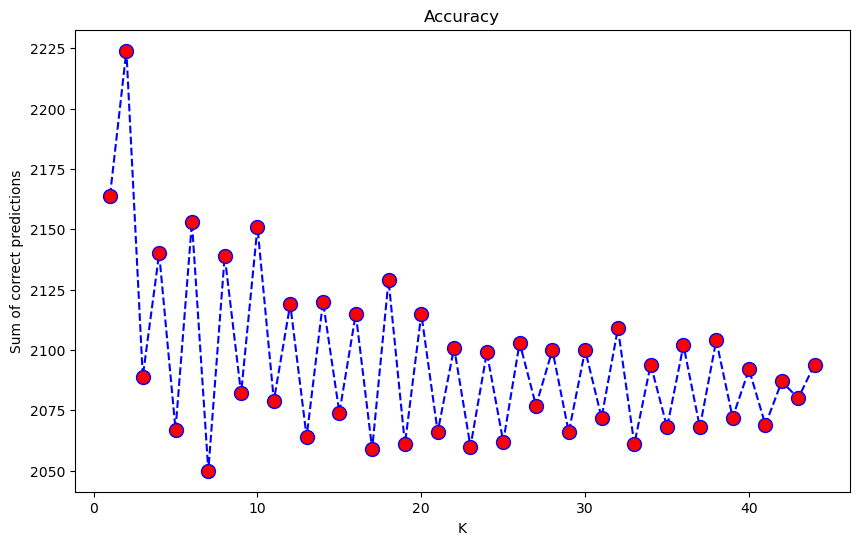

In [830]:
plt.figure(figsize=(10,6))
plt.plot(range(1,45),correct_sum,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy')
plt.xlabel('K')
plt.ylabel('Sum of correct predictions')

## Storing and Transposing KNN Prediction Results in a DataFrame

In [831]:
result = pd.DataFrame(data= correct_sum)
result.index = result.index+1
result.T

,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,39,40,41,42,43,44
0,2164,2224,2089,2140,2067,2153,2050,2139,2082,2151,...,2068,2102,2068,2104,2072,2092,2069,2087,2080,2094


In [832]:
print(correct_sum)

[2164, 2224, 2089, 2140, 2067, 2153, 2050, 2139, 2082, 2151, 2079, 2119, 2064, 2120, 2074, 2115, 2059, 2129, 2061, 2115, 2066, 2101, 2060, 2099, 2062, 2103, 2077, 2100, 2066, 2100, 2072, 2109, 2061, 2094, 2068, 2102, 2068, 2104, 2072, 2092, 2069, 2087, 2080, 2094]


## Training the model by taking k as 2 which depicsts teh highest accuracy among all the k values

In [833]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train_smote, y_train_smote)
kn_pred = knn_model.predict(X_test)

## Model Evaluation

In [834]:
knn_accuracy_score=accuracy_score(y_test,kn_pred)
knn_f1_score = f1_score(y_test, kn_pred, average='weighted')
knn_precision_score=precision_score(y_test,kn_pred,average='weighted')
knn_recall_score=recall_score(y_test,kn_pred,average='weighted')
print(knn_accuracy_score , knn_precision_score, knn_recall_score, knn_f1_score )

0.71950824975736 0.7013521704564066 0.71950824975736 0.7080333902043912


In [835]:
print(classification_report(y_test,kn_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82      2268
         1.0       0.47      0.37      0.41       823

    accuracy                           0.72      3091
   macro avg       0.63      0.61      0.61      3091
weighted avg       0.70      0.72      0.71      3091



In [836]:
print('KNN with SMOTE:')
print(f'Accuracy: {knn_accuracy_score:.4f}')
print(f'F1-Score: {knn_f1_score:.4f}')
print(f'Precision: {knn_precision_score:.4f}')
print(f'Recall: {knn_recall_score:.4f}')

KNN with SMOTE:
Accuracy: 0.7195
F1-Score: 0.7080
Precision: 0.7014
Recall: 0.7195


## Check Training vs. Testing Accuracy to detect overfitting or underfitting

In [846]:
# Training accuracy
train_pred = model.predict(X_train_smote)
train_accuracy = accuracy_score(y_train_smote, train_pred)

# Testing accuracy (already calculated in the notebook)
test_accuracy = accuracy_score(y_test, pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.7390317700453858
Testing Accuracy: 0.6774506632157877


## Confusion Matrix

In [849]:
cm = confusion_matrix(y_test, kn_pred)

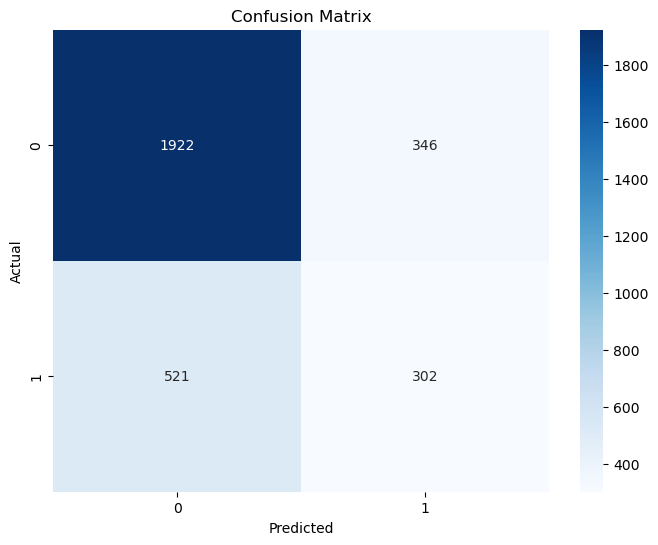

In [851]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

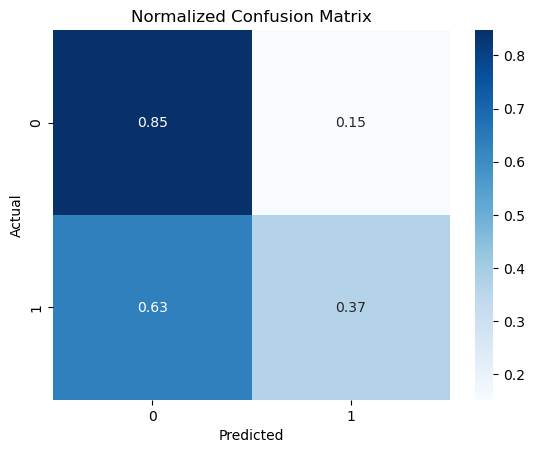

In [853]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

# Naive-Bayes Classifier

## Training the model

In [462]:
nb=GaussianNB()

In [855]:
nb.fit(X_train_smote,y_train_smote)

GaussianNB()

## Testing the model

In [857]:
nb_pred=nb.predict(X_test)
nb_pred[:5]

array([1., 1., 0., 1., 1.])

In [859]:
y_test

3100     0.0
10109    1.0
7445     0.0
7769     0.0
3305     1.0
        ... 
332      0.0
2084     1.0
3057     0.0
7289     0.0
3955     1.0
Name: CLAIM_FLAG, Length: 3091, dtype: float64

## Model Evaluation

In [866]:
nb_accuracy_score= accuracy_score(y_test,nb_pred)
nb_precision_score=precision_score(y_test,nb_pred, average='weighted')
nb_recall_score=recall_score(y_test,nb_pred, average='weighted')
nb_f1_score = f1_score(y_test, nb_pred, average='weighted')
print(nb_accuracy_score , nb_precision_score, nb_recall_score )

0.6848916208346814 0.7809067540951617 0.6848916208346814


## Classification Report

In [869]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.64      0.75      2268
         1.0       0.45      0.81      0.58       823

    accuracy                           0.68      3091
   macro avg       0.68      0.72      0.66      3091
weighted avg       0.78      0.68      0.70      3091



## Confusion Matrix

Predictions: [1. 1. 0. 1. 1.]
True Labels: [0. 1. 0. 0. 1.]
Accuracy: 0.68
True Negatives (TN): 1453
False Positives (FP): 815
False Negatives (FN): 159
True Positives (TP): 664


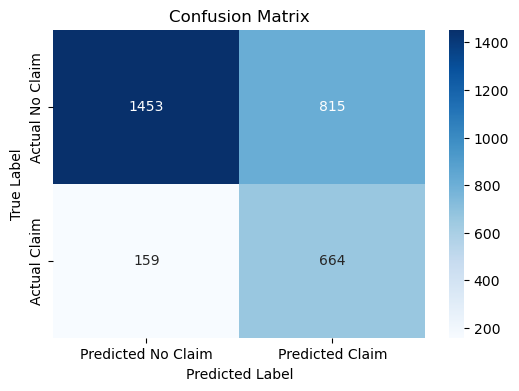

In [874]:
# Print first 5 predictions and corresponding true labels
print("Predictions:", nb_pred[:5])
print("True Labels:", y_test[:5].values)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, nb_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, nb_pred)

# Extract TN, FP, FN, TP from the confusion matrix
TN, FP, FN, TP = cm.ravel()

print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No Claim', 'Predicted Claim'],
            yticklabels=['Actual No Claim', 'Actual Claim'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

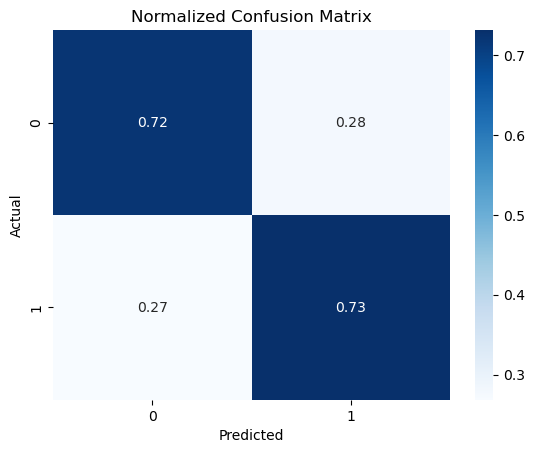

In [471]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

# Support Vector Classifier

## Traing the model

In [876]:
svc_model = SVC(kernel='linear', random_state=42)

In [878]:

svc_model

SVC(kernel='linear', random_state=42)

In [880]:
svc_result = svc_model.fit(X_train_smote,y_train_smote)

In [882]:
svc_pred = svc_result.predict(X_test)

## Model Evaluation

In [884]:
svc_accuracy_score=accuracy_score(y_test,svc_pred)
svc_f1_score = f1_score(y_test, svc_pred, average='weighted')
svc_precision_score=precision_score(y_test,svc_pred, average='weighted')
svc_recall_score=recall_score(y_test,svc_pred, average='weighted')

In [886]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.68      0.77      2268
         1.0       0.47      0.79      0.59       823

    accuracy                           0.71      3091
   macro avg       0.69      0.73      0.68      3091
weighted avg       0.79      0.71      0.72      3091



--------

----------

## Performing Hyperparameter Tunning using GridSearchCV

In [888]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly']
}

# Perform grid search
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train_smote, y_train_smote)

# Best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best Cross-validation Score:", grid.best_score_)

Best Parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best Cross-validation Score: 0.8752881345327953


## Evaluating model performance on test data

Test Accuracy: 0.7120672921384665
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81      2268
         1.0       0.45      0.38      0.41       823

    accuracy                           0.71      3091
   macro avg       0.62      0.61      0.61      3091
weighted avg       0.70      0.71      0.70      3091



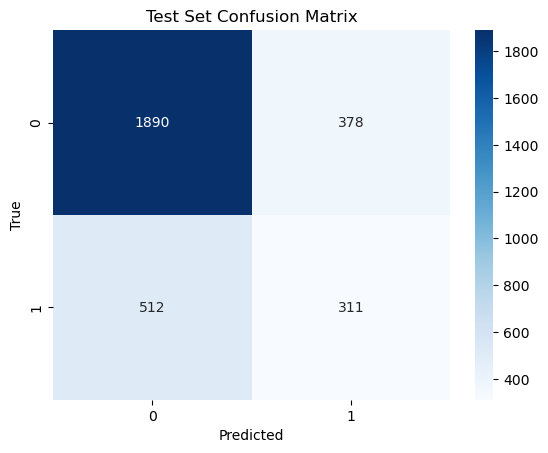

In [889]:
# Make predictions with the best model
best_svc = grid.best_estimator_
y_test_pred = best_svc.predict(X_test)

# Evaluate the best model
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

# Confusion Matrix for Test Set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues')
plt.title('Test Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Confusion Matrix for test data

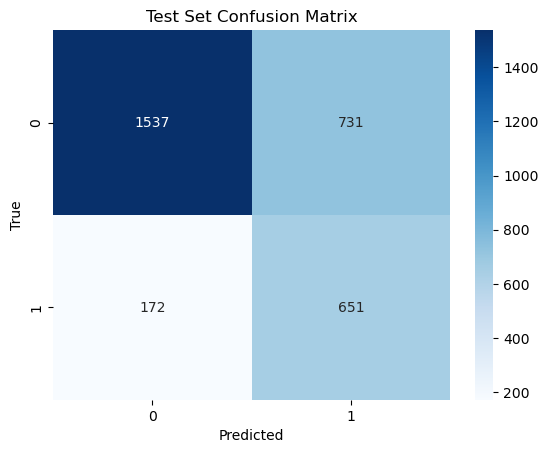

In [890]:
confusion_mat_test = confusion_matrix(y_test, svc_pred)
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues')
plt.title('Test Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

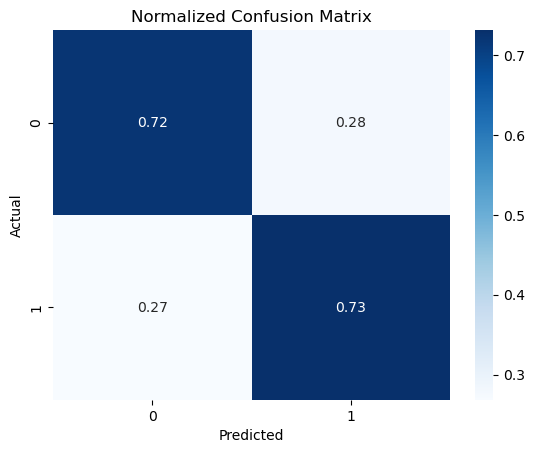

In [484]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

# Decision Tree Classifier

## Training the model

In [891]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=10, random_state = 42)

In [892]:
dt_result=dt_model.fit(X_train_smote, y_train_smote)

In [893]:
dt_pred = dt_result.predict(X_test)

## Model Evaluation

In [895]:
dt_accuracy_score=accuracy_score(y_test, dt_pred)
dt_f1_score = f1_score(y_test, dt_pred, average='weighted')
dt_precision_score=precision_score(y_test,dt_pred, average='weighted')
dt_recall_score=recall_score(y_test,dt_pred, average='weighted')

In [896]:
print(f'Classification Report: \n{classification_report(y_test, dt_pred)}')

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.84      0.75      0.79      2268
         1.0       0.47      0.60      0.53       823

    accuracy                           0.71      3091
   macro avg       0.65      0.68      0.66      3091
weighted avg       0.74      0.71      0.72      3091



## Confusion matrix

In [897]:
cm = confusion_matrix(y_test, dt_pred)

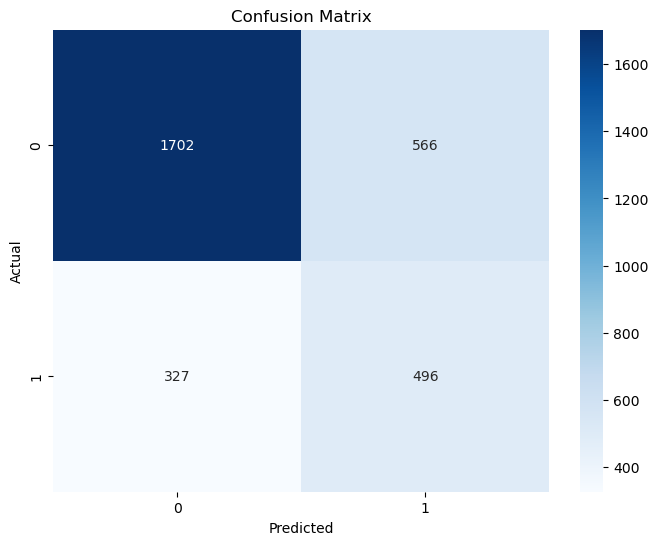

In [898]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

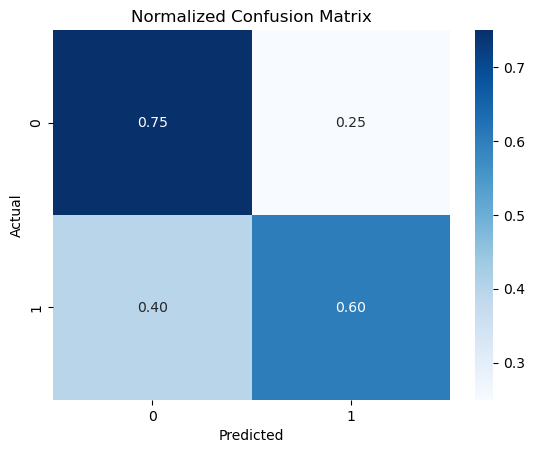

In [899]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

# Random Forest Classifier

## Training the model

In [900]:
rf = RandomForestClassifier(n_estimators = 2000, max_depth=26,min_samples_split=3, random_state=42)

In [901]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=26, min_samples_split=3, n_estimators=2000,
                       random_state=42)

In [902]:
rf_pred = rf.predict(X_test)

## Model Evaluation

In [903]:
rf_accuracy_score = accuracy_score(y_test,rf_pred)
rf_f1_score = f1_score(y_test, rf_pred, average='weighted')
rf_precision_score=precision_score(y_test,rf_pred, average='weighted')
rf_recall_score=recall_score(y_test,rf_pred, average='weighted')

print(rf_accuracy_score ,rf_f1_score , rf_precision_score, rf_recall_score )


0.8020058233581365 0.7328918322295805 0.40340218712029163


In [904]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.95      0.88      2268
         1.0       0.73      0.40      0.52       823

    accuracy                           0.80      3091
   macro avg       0.77      0.68      0.70      3091
weighted avg       0.79      0.80      0.78      3091



## Confusion Matrix

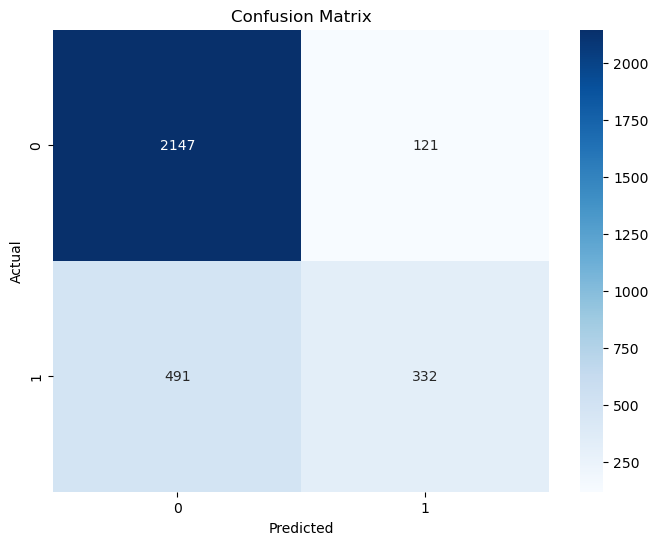

In [905]:
cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

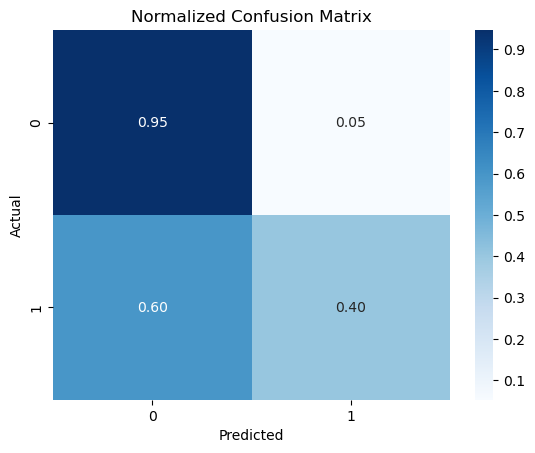

In [906]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

# Gradient Boost Classifier

## Training and Evaluating the model with accuracy , precision , recall and F1 score

In [908]:
# Initialize the GradientBoostingClassifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training data
gbm.fit(X_train, y_train)

# Predict on the test data
y_pred = gbm.predict(X_test)


# Evaluate the model
gb_accuracy_score = accuracy_score(y_test, y_pred)
gb_precision_score = precision_score(y_test, y_pred, average='weighted')
gb_recall_score = recall_score(y_test, y_pred, average='weighted')
gb_f1_score = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {gb_accuracy_score}")
print(f"Precision: {gb_precision_score}")
print(f"Recall: {gb_recall_score}")
print(f"F1 Score: {gb_f1_score}")  # Use weighted average for imbalanced data
print(classification_report(y_test, y_pred))

Accuracy: 0.7987706243934002
Precision: 0.7867565267718925
Recall: 0.7987706243934002
F1 Score: 0.7802109242064288
              precision    recall  f1-score   support

         0.0       0.82      0.94      0.87      2268
         1.0       0.70      0.42      0.53       823

    accuracy                           0.80      3091
   macro avg       0.76      0.68      0.70      3091
weighted avg       0.79      0.80      0.78      3091



## Confusion Matrix

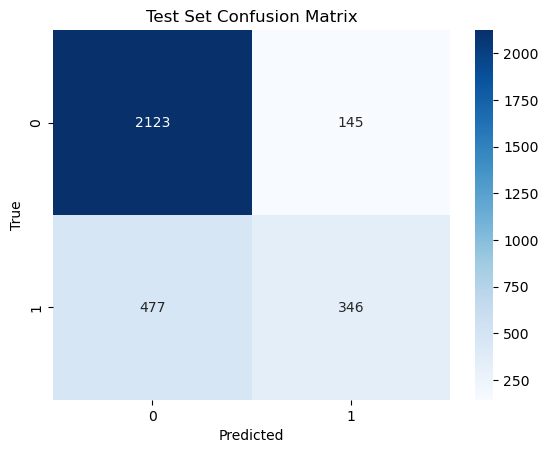

In [909]:
confusion_mat_test = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues')
plt.title('Test Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Hyperparameter tunning using GridSearchCV with f1 Score evaluation.

In [910]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Set up the GridSearch
grid_search = GridSearchCV(gbm,param_grid=param_grid, cv=5, scoring='f1_weighted', verbose=1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best F1 Score: {grid_search.best_score_}")

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Test F1 Score: {f1_score(y_test, y_pred, average='weighted')}")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 Score: 0.7733742497878343
Test F1 Score: 0.7855161886318935
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87      2268
         1.0       0.69      0.46      0.55       823

    accuracy                           0.80      3091
   macro avg       0.75      0.69      0.71      3091
weighted avg       0.79      0.80      0.79      3091



## Confusion Matrix after hyperparameter tunning

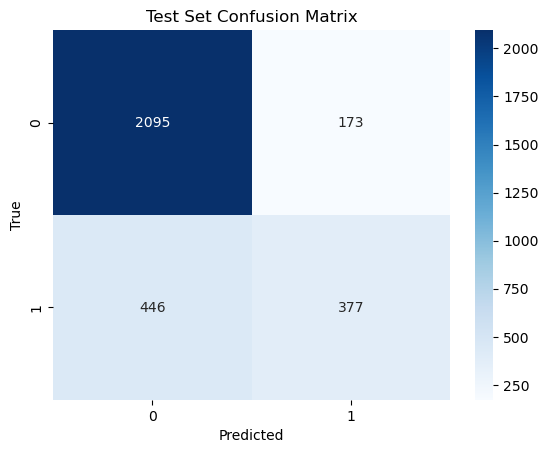

In [911]:
confusion_mat_test = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues')
plt.title('Test Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Resampling The dataset to reduce imbalance uisng SMOTE

In [936]:
# Train the GBM model on resampled data
gbm.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred = gbm.predict(X_test)
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")
print(classification_report(y_test, y_pred))

F1 Score: 0.7891336168890072
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86      2268
         1.0       0.61      0.60      0.60       823

    accuracy                           0.79      3091
   macro avg       0.73      0.73      0.73      3091
weighted avg       0.79      0.79      0.79      3091



## Confusion matrix after resampling

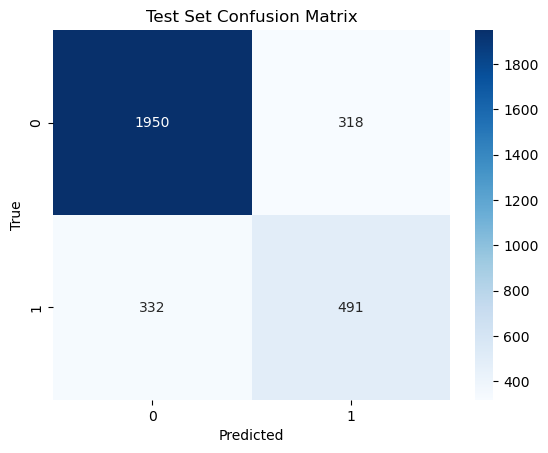

In [937]:
confusion_mat_test = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues')
plt.title('Test Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Hyperparameter tunning the model on resampled data

In [940]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Set up the GridSearch
grid_search = GridSearchCV(gbm,
                           param_grid=param_grid, cv=5, scoring='f1_weighted', verbose=1)

# Fit the grid search
grid_search.fit(X_train_smote, y_train_smote)

# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best F1 Score: {grid_search.best_score_}")

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Test F1 Score: {f1_score(y_test, y_pred, average='weighted')}")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 Score: 0.8257790559906052
Test F1 Score: 0.788180865979309
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      2268
         1.0       0.64      0.53      0.58       823

    accuracy                           0.79      3091
   macro avg       0.74      0.71      0.72      3091
weighted avg       0.79      0.79      0.79      3091



In [941]:
gb_f1_score = f1_score(y_test, y_pred)
gb_f1_score

0.5799207397622193

# Classifier Comparison based on Accuracy,Precision and Recall



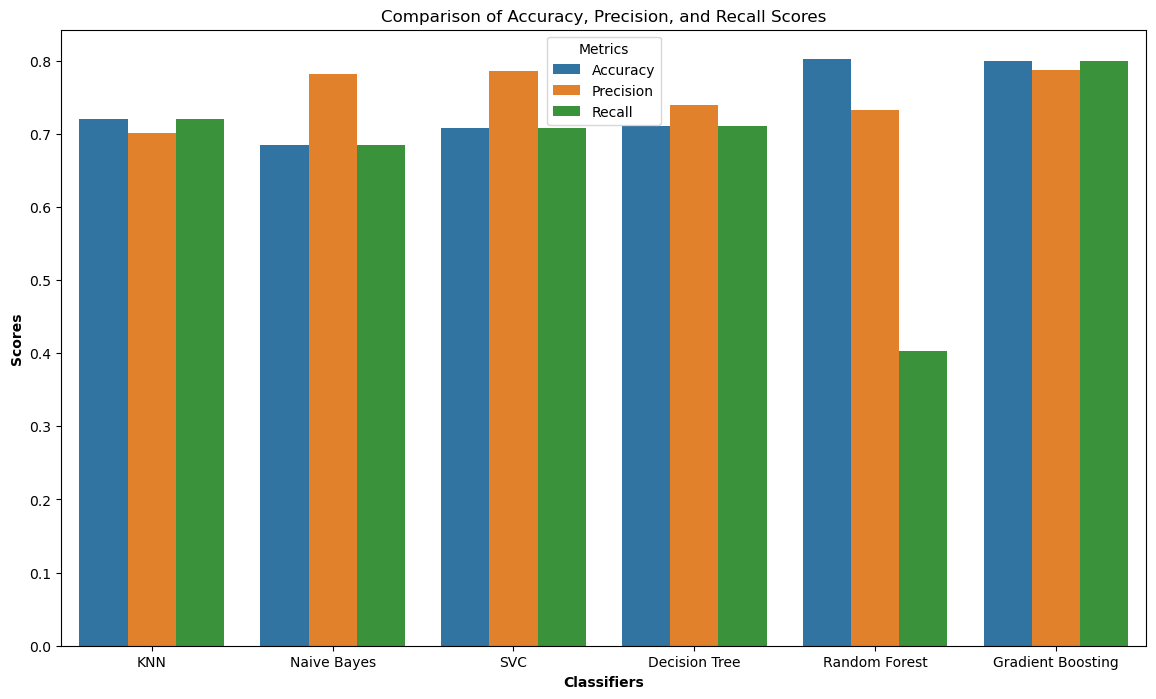

In [955]:

classifiers = ['KNN', 'Naive Bayes', 'SVC', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
accuracy_scores = [knn_accuracy_score, nb_accuracy_score, svc_accuracy_score, dt_accuracy_score, rf_accuracy_score, gb_accuracy_score]
precision_scores = [knn_precision_score, nb_precision_score, svc_precision_score, dt_precision_score, rf_precision_score, gb_precision_score]
recall_scores = [knn_recall_score, nb_recall_score, svc_recall_score, dt_recall_score, rf_recall_score, gb_recall_score]

data = {
    'Classifiers': classifiers,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores
}
df_plot = pd.DataFrame(data)
df_melted = df_plot.melt(id_vars='Classifiers', var_name='Metrics', value_name='Scores')


plt.figure(figsize=(14, 8))
sns.barplot(x='Classifiers', y='Scores', hue='Metrics', data=df_melted)
plt.xlabel('Classifiers', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.title('Comparison of Accuracy, Precision, and Recall Scores')

plt.show()


## Accuracy pie chart

([<matplotlib.patches.Wedge at 0x13ec5673dd0>,
 [Text(0.8930260679614341, 0.6422650869705905, 'KNN'),
  Text(-0.2930822251083824, 1.0602371476823096, 'Naive Bayes'),
  Text(-1.0951233978871244, 0.10346372987747463, 'SVC'),
  Text(-0.4639325433169183, -0.9973798650722281, 'Decision Tree'),
  Text(0.8448693713853489, -0.7044116305789715, 'Random Forest')],
 [Text(0.487105127978964, 0.3503264110748675, '19.85%'),
  Text(-0.15986303187729947, 0.5783111714630779, '18.89%'),
  Text(-0.5973400352111587, 0.05643476175134979, '19.53%'),
  Text(-0.2530541145365009, -0.544025380948488, '19.61%'),
  Text(0.460837838937463, -0.38422452577034805, '22.12%')])

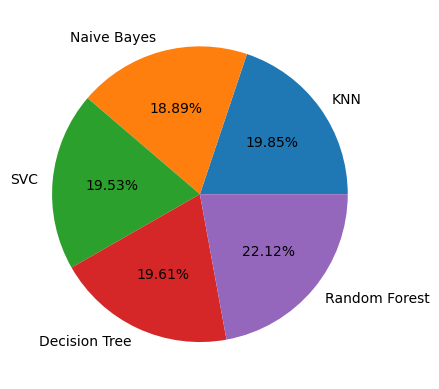

In [958]:
index = ['KNN', 'Naive Bayes', 'SVC', 'Decision Tree', 'Random Forest']
values = [knn_accuracy_score, nb_accuracy_score, svc_accuracy_score, dt_accuracy_score, rf_accuracy_score] 

plt.pie(values, labels = index, autopct='%1.2f%%')

# Classifier Comparison based on the F1 score

In [1004]:
knn_f1_score, nb_f1_score, svc_f1_score, dt_f1_score, rf_f1_score, gb_f1_score

(0.7080333902043912,
 0.7031517459748444,
 0.7243610071432326,
 0.7213773914516909,
 0.5203761755485894,
 0.5799207397622193)

C:\Users\94773\AppData\Local\Temp\ipykernel_13144\3056747843.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Classifiers', y='F1 Scores', data=df_plot, palette='Blues_d')


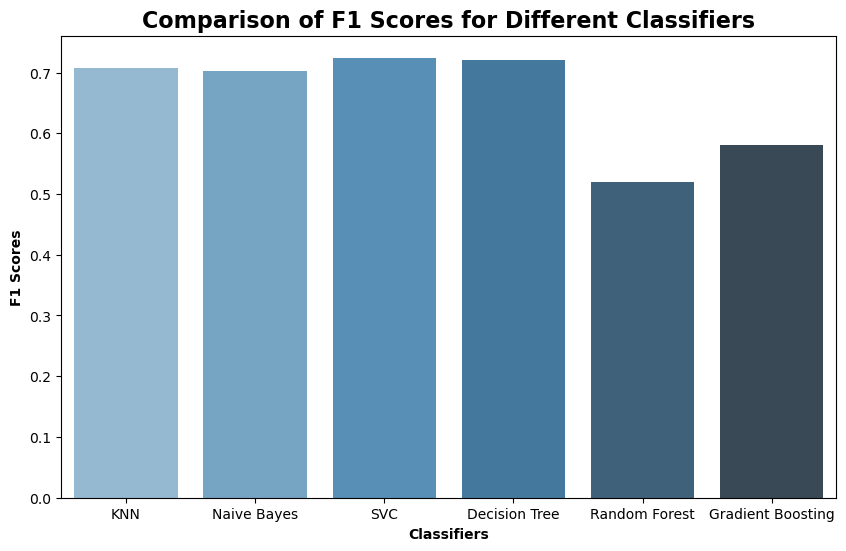

In [962]:
# F1 scores for the classifiers
classifiers = ['KNN', 'Naive Bayes', 'SVC', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
f1_scores = [knn_f1_score, nb_f1_score, svc_f1_score, dt_f1_score, rf_f1_score, gb_f1_score]

# Create a dataframe for F1-scores
data = {
    'Classifiers': classifiers,
    'F1 Scores': f1_scores
}
df_plot = pd.DataFrame(data)

# Plotting F1 Scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Classifiers', y='F1 Scores', data=df_plot, palette='Blues_d')
plt.xlabel('Classifiers', fontweight='bold')
plt.ylabel('F1 Scores', fontweight='bold')
plt.title('Comparison of F1 Scores for Different Classifiers', fontsize=16, fontweight='bold')

plt.show()